## Observations and Insights

Comparing the results obtained from the drug regimen treatment versus the number of data point we can observed that Capomulin has the higher use followed by Ramicane.

Comparing the percentage of female and male mouse selected for treatment, I observed a proportion selection. Female = 50.6% and Male = 49.4%

Comparing both methodology pandas and matplotlib I get identical solution. Both methodologies generate similar results.

For the treatment Capomulin the relationship between Tumor Volume and Timepoint for specific mouse is negative, i.e. mouse b128 reduce the tumor volume significantly after 25 days of treatment. 

The analysis of mouse wieght versus tumor volume for an specific drug regimen Capomulin shows positive relatioship where increase in weight produce increase in tumor volume 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the study results
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [103]:
# Combine the data into a single dataset
combine_df = study_results.merge(mouse_metadata, on="Mouse ID", how="left")
combine_df.head(2000)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Review any missing value
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Display the table combined
combine_df.head()
#delete later

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#Define a group by Drug Regimen and Timepoint
group_results = combine_df.groupby(["Drug Regimen", "Timepoint"])
group_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1853,t724,45,75.113288,2,Naftisol,Female,2,25
1861,l725,45,76.668817,3,Naftisol,Female,8,26
1863,l700,45,63.946640,1,Naftisol,Female,18,27
1871,i635,45,58.633404,3,Propriva,Male,21,26


In [8]:
#Calculate the mean of Tumor Volume
tumor_volume_mean = pd.DataFrame(group_results["Tumor Volume (mm3)"].mean())

#Display Data Frame
tumor_volume_mean.head(5)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325

In [9]:
#Define a drug regimen by Tumor Volume (mm3)

# Calculate Tumor Volume SEM
tumor_volume_sem = pd.DataFrame(group_results["Tumor Volume (mm3)"].sem())

#Display Data Frame
tumor_volume_sem.head(10)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731
             25                   0.881642
             30                   0.934460
             35                   1.052241
             40                   1.223608
             45                   1.223977

In [10]:
# Calculate Tumor Volume Median
tumor_volume_median = pd.DataFrame(group_results["Tumor Volume (mm3)"].median())

#Display Data Frame
tumor_volume_median.head(10)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   45.597064
             10                  43.421014
             15                  42.798160
             20                  40.716428
             25                  40.224165
             30                  39.260371
             35                  38.360455
             40                  36.843898
             45                  37.311846

In [11]:
# Calculate Tumor Volume Variance
tumor_volume_variance = pd.DataFrame(group_results["Tumor Volume (mm3)"].var())

#Display Data Frame
tumor_volume_variance.head(10)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    5.030889
             10                  12.344133
             15                  16.878693
             20                  19.035028
             25                  17.100444
             30                  19.210721
             35                  24.358640
             40                  31.441568
             45                  31.460537

In [12]:
# Calculate Tumor Volume Variance
tumor_volume_std = pd.DataFrame(group_results["Tumor Volume (mm3)"].std())

#Display Data Frame
tumor_volume_std.head(5)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    2.242964
             10                   3.513422
             15                   4.108369
             20                   4.362915

In [13]:
# Generate a table with the summary of the statistics
# Rename the title of the columns of the table
tumor_volume_mean = tumor_volume_variance.rename(columns={"Tumor Volume (mm3)":"Mean"}) 
tumor_volume_sem = tumor_volume_sem.rename(columns={"Tumor Volume (mm3)":"SEM"}) 
tumor_volume_median = tumor_volume_median.rename(columns={"Tumor Volume (mm3)":"Median"}) 
tumor_volume_variance = tumor_volume_variance.rename(columns={"Tumor Volume (mm3)":"Variance"}) 
tumor_volume_std = tumor_volume_std.rename(columns={"Tumor Volume (mm3)":"STDev"}) 
#summary_stat = [mean_volume, median_volume, variance, stdev, SEM]

summary_stat = [tumor_volume_mean, tumor_volume_median, tumor_volume_variance, tumor_volume_std, tumor_volume_sem]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

Mean     Median   Variance     STDev       SEM
Drug Regimen Timepoint                                                     
Capomulin    0           0.000000  45.000000   0.000000  0.000000  0.000000
             5           5.030889  45.597064   5.030889  2.242964  0.448593
             10         12.344133  43.421014  12.344133  3.513422  0.702684
             15         16.878693  42.798160  16.878693  4.108369  0.838617
             20         19.035028  40.716428  19.035028  4.362915  0.909731
...                           ...        ...        ...       ...       ...
Zoniferol    25          5.808348  55.676604   5.808348  2.410052  0.602513
             30          9.601024  57.419744   9.601024  3.098552  0.800043
             35         10.876760  60.365832  10.876760  3.297993  0.881426
             40         13.958456  62.274543  13.958456  3.736102  0.998515
             45         14.100301  65.684689  14.100301  3.755037  1.003576

[100 rows x 5 columns]

## Bar plots

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas "DataFrame.plot()"
counts = combine_df['Drug Regimen'].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

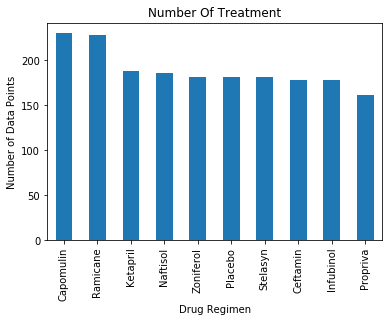

In [15]:
counts.plot(kind="bar")
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Data Points')
plt.title('Number Of Treatment')
plt.show()

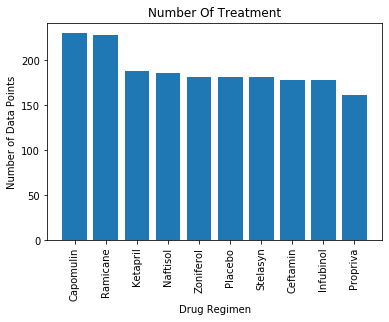

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using Matplolib's pyplot
plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Data Points')
plt.title('Number Of Treatment')
plt.show()

## Pie plots

In [17]:
# Dependencies
import pandas as pd

In [18]:
#Define a group by Drug Regimen and Timepoint
group_results_sex = combine_df.groupby(["Sex", "Timepoint"])
group_results_sex.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1768,b559,45,73.051363,1,Naftisol,Male,20,26
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1770,c282,45,65.815165,2,Placebo,Male,12,27
1772,j296,45,61.849023,3,Ceftamin,Female,24,30


In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas (DataFrame.plot)
sex_counts = combine_df['Sex'].value_counts()
sex_counts

Male      958
Female    935
Name: Sex, dtype: int64

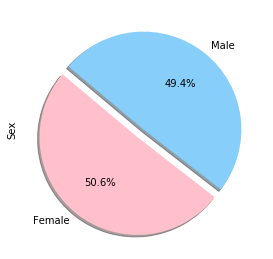

In [20]:
# Define Characteristics of the graph

# Define the labels for the sections of pie chart
labels = ['Female','Male']

# Bring the values for each section of the pie
sizes = [958,935]

#define color for each section
colors = ["pink","lightskyblue"]

#separate the female from male
explode = (0.1,0)

sex_counts.plot(kind="pie", figsize=(4.5,4.5), labels=labels, explode=explode, 
                colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

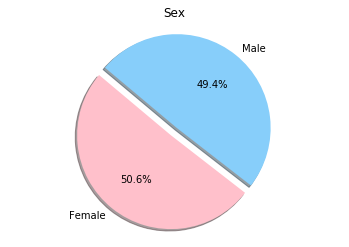

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define Characteristics of the graph
# Define the labels for the sections of pie chart
labels = ['Female','Male']

# Bring the values for each section of the pie
sizes = [958,935]

#define color for each section
colors = ["pink","lightskyblue"]

#separate the female from male
explode = (0.1,0)

# Generate a pie plot showing the distribution of female versus male
plt.title("Sex")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show

## Quartiles, outliers and boxplots

In [47]:
#group data by drug and timepoint 
#Define a group by Drug Regimen and Timepoint
#group_results = combine_df.groupby(["Drug Regimen", "Timepoint"])
#group_results.head()

#find avg tumor volume and metastic sites for each drug at each timepoint
drugAvgs = group_results.max()
drugAvgs.head(5)


Mouse ID  Tumor Volume (mm3)  Metastatic Sites   Sex  \
Drug Regimen Timepoint                                                        
Capomulin    0             y793           45.000000                 0  Male   
             5             y793           45.895647                 1  Male   
             10            y793           46.759074                 2  Male   
             15            y793           47.488599                 2  Male   
             20            y793           48.158209                 2  Male   

                        Age_months  Weight (g)  
Drug Regimen Timepoint                          
Capomulin    0                  24          25  
             5                  24          25  
             10                 24          25  
             15                 24          25  
             20                 24          25

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

# list the drug to analyse
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# list of the timepoints
timepoint = np.arange(0,50,5)

drug_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [45]:
#group data by mouse ID, drug regimen, timepoint and tumor volume (mm3)
tumor_volume_max = combine_df.groupby(['Mouse ID','Drug Regimen']).max()['Tumor Volume (mm3)']
tumor_volume_max

Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a262      Placebo         70.717621
a275      Ceftamin        62.999356
a366      Stelasyn        63.440686
                            ...    
z435      Propriva        48.710661
z578      Ramicane        45.000000
z581      Infubinol       62.754451
z795      Naftisol        65.741070
z969      Naftisol        73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [24]:
# Group the data by "drug" and "Timepoint"
tumor_volume_Df = combine_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :["mean"]})
tumor_volume_Df

,Tumor Volume (mm3)
,mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745


In [25]:
# Create a table to show the results
#create a list of the tumor volume mean for each of the four drugs being compared
Capomulin_tumor_volume_avg = tumor_volume_Df.loc["Capomulin"].loc[:,"mean"].tolist()
Ramicane_tumor_volume_avg = tumor_volume_Df.loc["Ramicane"].loc[:,"mean"].tolist()
Infubinol_tumor_volume_avg = tumor_volume_Df.loc["Infubinol"].loc[:,"mean"].tolist()
Ceftamin_tumor_volume_avg = tumor_volume_Df.loc["Ceftamin"].loc[:,"mean"].tolist()


In [26]:
# Create a table to show the results
tumorVolumeAvgList = [Capomulin_tumor_volume_avg, Ramicane_tumor_volume_avg,
                         Infubinol_tumor_volume_avg, Ceftamin_tumor_volume_avg]
tumorVolumeAvgList

[[40.675741141], [40.216745066710544], [52.8847951085955], [52.59117180960675]]

In [27]:
# list the drug to analyse
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [28]:
# create a data frame to storage the results of Tumor Volume Mean
Tumor_volume_table = pd.DataFrame({"Drug Regimen": drug_list, "Tumor Volume Average (mm3)": tumorVolumeAvgList})
Tumor_volume_table

,Drug Regimen,Tumor Volume Average (mm3)
0,Capomulin,[40.675741141]
1,Ramicane,[40.216745066710544]
2,Infubinol,[52.8847951085955]
3,Ceftamin,[52.59117180960675]


In [229]:
# recall dpendencies
import numpy as np
import pylab as plt
import seaborn as sns
import os

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

In [143]:
# Generate the data to plot Timepoint versus Tumor Volume (mm3) for a simgle mouse treated with Capomulin

# Bring to this line the Combine the data into a single dataset(only to preview the table values)
combine_df.head(2000)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [160]:
# Define a group by Timepoint vs Tumor Volume
volume = pd.DataFrame(combine_df.groupby(['Mouse ID','Drug Regimen', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume

Tumor Volume (mm3)
Mouse ID Drug Regimen Timepoint                    
a203     Infubinol    0                   45.000000
                      5                   48.508468
                      10                  51.852437
                      15                  52.777870
                      20                  55.173336
...                                             ...
z969     Naftisol     25                  63.145652
                      30                  65.841013
                      35                  69.176246
                      40                  70.314904
                      45                  73.867845

[1888 rows x 1 columns]

In [144]:
# Drop some columns 'Sex', 'Age_months','Weight (g)', 'Metastatic Sites'

combine_df.head(2000)
combine_df_1 = combine_df.drop(['Sex', 'Age_months','Weight (g)', 'Metastatic Sites'], axis=1)
combine_df_1


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,0,45.000000,Capomulin
1,f932,0,45.000000,Ketapril
2,g107,0,45.000000,Ketapril
3,a457,0,45.000000,Ketapril
4,c819,0,45.000000,Ketapril
...,...,...,...,...
1888,r944,45,41.581521,Capomulin
1889,u364,45,31.023923,Capomulin
1890,p438,45,61.433892,Ceftamin
1891,x773,45,58.634971,Placebo


In [146]:
# convert to data frame
combine_frame = pd.DataFrame(combine_df_1)

# preview the data frame
combine_frame = combine_frame.reset_index()
combine_frame


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,0,b128,0,45.000000,Capomulin
1,1,f932,0,45.000000,Ketapril
2,2,g107,0,45.000000,Ketapril
3,3,a457,0,45.000000,Ketapril
4,4,c819,0,45.000000,Ketapril
...,...,...,...,...,...
1888,1888,r944,45,41.581521,Capomulin
1889,1889,u364,45,31.023923,Capomulin
1890,1890,p438,45,61.433892,Ceftamin
1891,1891,x773,45,58.634971,Placebo


In [175]:
# Create dataframe for a single mouse
b128 = combine_frame.loc[(combine_frame["Mouse ID"] == "b128"), :]

In [177]:
# create line plot for b128
mouse_id = "b128"
b128_tumor_volume = b128["Tumor Volume (mm3)"]
b128_timepoint = b128["Timepoint"]
print(b128_timepoint)
print(b128_tumor_volume)

0        0
472      5
679     10
719     15
933     20
1268    25
1400    30
1547    35
1629    40
1764    45
Name: Timepoint, dtype: int64
0       45.000000
472     45.651331
679     43.270852
719     43.784893
933     42.731552
1268    43.262145
1400    40.605335
1547    37.967644
1629    38.379726
1764    38.982878
Name: Tumor Volume (mm3), dtype: float64


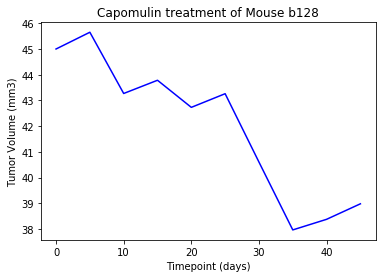

In [206]:
# Generate the line plot
plt.title(f"Capomulin treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(b128_timepoint, b128_tumor_volume, color="blue", label="Capomulin")

plt.show()

In [154]:
# Bring to this line the Combine the data into a single dataset(only to preview the table values)
combine_df.head(2000)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [190]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
combine_df.head(2000)
combine_df_2 = combine_df.drop(['Sex', 'Age_months','Timepoint', 'Metastatic Sites'], axis=1)
combine_df_2

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
0,b128,45.000000,Capomulin,22
1,f932,45.000000,Ketapril,29
2,g107,45.000000,Ketapril,29
3,a457,45.000000,Ketapril,30
4,c819,45.000000,Ketapril,25
...,...,...,...,...
1888,r944,41.581521,Capomulin,25
1889,u364,31.023923,Capomulin,17
1890,p438,61.433892,Ceftamin,26
1891,x773,58.634971,Placebo,30


In [192]:
# Convert to data frame
mouse_weight_frame = pd.DataFrame(combine_df_2)

# Define a group by Mouse weight vs Tumor Volume
mouse_weight_frame = mouse_weight_frame.reset_index()

mouse_weight_frame

,index,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
0,0,b128,45.000000,Capomulin,22
1,1,f932,45.000000,Ketapril,29
2,2,g107,45.000000,Ketapril,29
3,3,a457,45.000000,Ketapril,30
4,4,c819,45.000000,Ketapril,25
...,...,...,...,...,...
1888,1888,r944,41.581521,Capomulin,25
1889,1889,u364,31.023923,Capomulin,17
1890,1890,p438,61.433892,Ceftamin,26
1891,1891,x773,58.634971,Placebo,30


In [194]:
# Create dataframe for a single drug regimen "Capomulin"
capomulin = mouse_weight_frame.loc[(mouse_weight_frame['Drug Regimen']=='Capomulin'),:]
capomulin

,index,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
0,0,b128,45.000000,Capomulin,22
226,226,j246,45.000000,Capomulin,21
227,227,r554,45.000000,Capomulin,17
228,228,s185,45.000000,Capomulin,17
229,229,b742,45.000000,Capomulin,21
...,...,...,...,...,...
1854,1854,s710,40.728578,Capomulin,23
1859,1859,j119,38.125164,Capomulin,23
1878,1878,i557,47.685963,Capomulin,24
1888,1888,r944,41.581521,Capomulin,25


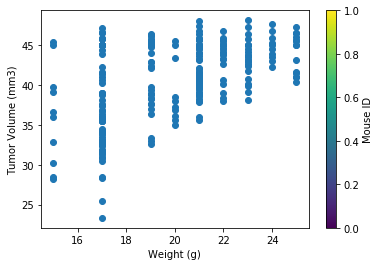

In [216]:
# plot the scatter
weight = capomulin['Weight (g)']
volume = capomulin['Tumor Volume (mm3)']
plt.scatter(weight,volume)
clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
clb.set_label("Mouse ID")

plt.show()

In [218]:
# Call the dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [221]:
# Perform a linear regression on weight (g) versus tumor volume (mm3)
# tv = tumor volume (mm3)

tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(weight, volume)

In [222]:
# Create equation of line to calculate predicted violent crime rate
tv_fit = tv_slope * weight + tv_int

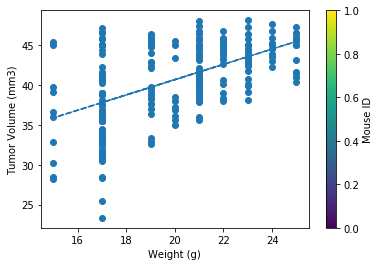

In [224]:
# plot the scatter
weight = capomulin['Weight (g)']
volume = capomulin['Tumor Volume (mm3)']
plt.scatter(weight,volume)
plt.plot(weight, tv_fit, "--")
clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
clb.set_label("Mouse ID")

plt.show()

In [226]:
# call Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [228]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
print(f"The correlation coefficient between malic acid and flavanoids is \
{round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between malic acid and flavanoids is 0.53
